In [6]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import numpy as np
import time_conversion as tconv

ID = np.loadtxt('../_data/my_halos.dat')[:,0]


for i in range(14):
    
    Id = ''
    for aux in list(str('%d'%ID[i]))[-2:]:
        Id += aux
        
    mass_str = np.ones(96)*np.nan
    mass_gas = np.ones(96)*np.nan
    mass_drk = np.ones(96)*np.nan
    tiempo = np.ones(96)*np.nan
    
    k = 0
        
    for j in range(127,31,-1):
        
        path = '/store/erebos/omarioni/_simulations/snap_'+str('%03d'%j)
            
        snap = h5py.File(path + '/subhalo_'+str('%d'%ID[i])+'.h5py', 'r')

        aexp = snap['/Time'][()]
        h    = snap['/h'][()]
        Om_L = snap['/Omega_Lambda'][()]
        Om_M = snap['/Omega_0'][()]
        Rvir = snap['/R200'][()]

        mstr = snap['/Str/Masses'][()]
        pstr = snap['/Str/Coordinates'][()]
        sft  = snap['/Str/FormationTime'][()]
        
        mgas = snap['/Gas/Masses'][()]
        pgas = snap['/Gas/Coordinates'][()]
        
        mdrk = snap['/Drk/Masses'][()]
        pdrk = snap['/Drk/Coordinates'][()]
        
        amask, = np.where(sft>0) #aca puede haber particulas con age<0, esas no son estrellas son gas cells.
        time = tconv.conv2(aexp, h, Om_L, Om_M)
        
        xstr = pstr[amask,0]*aexp /h
        ystr = pstr[amask,1]*aexp /h
        zstr = pstr[amask,2]*aexp /h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = pgas[:,0]*aexp /h
        ygas = pgas[:,1]*aexp /h
        zgas = pgas[:,2]*aexp /h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = pdrk[:,0]*aexp /h
        ydrk = pdrk[:,1]*aexp /h
        zdrk = pdrk[:,2]*aexp /h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

        mstr = mstr[amask]*1e10/h
        mgas = mgas*1e10/h
        mdrk = mdrk*1e10/h

        R200 = Rvir*aexp/h
        rgal = 0.15*Rvir*aexp/h

        limit_str, = np.where(rstr < rgal)
        limit_gas, = np.where(rgas < rgal)
        limit_drk, = np.where(rdrk < R200)
        
        Mstr = np.sum(mstr[limit_str])
        Mgas = np.sum(mgas[limit_gas])
        Mdrk = np.sum(mdrk[limit_drk])
        
        mass_str[k]= Mstr
        mass_gas[k]= Mgas
        mass_drk[k]= Mdrk
        tiempo[k] = time
        
        k += 1
    
    data = np.ndarray([96,4])
    data[:,0] = tiempo
    data[:,1] = mass_str
    data[:,2] = mass_gas
    data[:,3] = mass_drk
    
    np.savetxt('../_data/masses/mass_time_sh'+Id+'.dat', data, fmt=('%12.8f','%12.8f','%12.8f','%12.8f'))
 

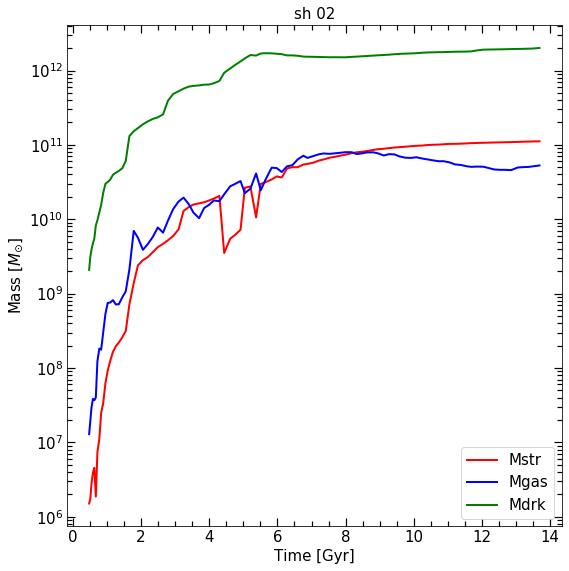

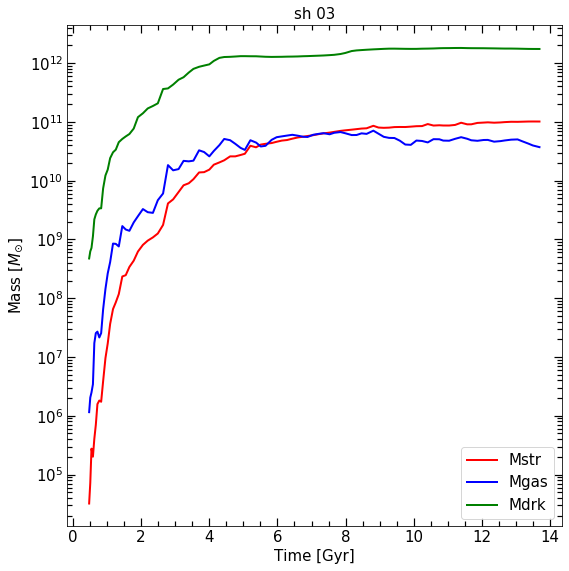

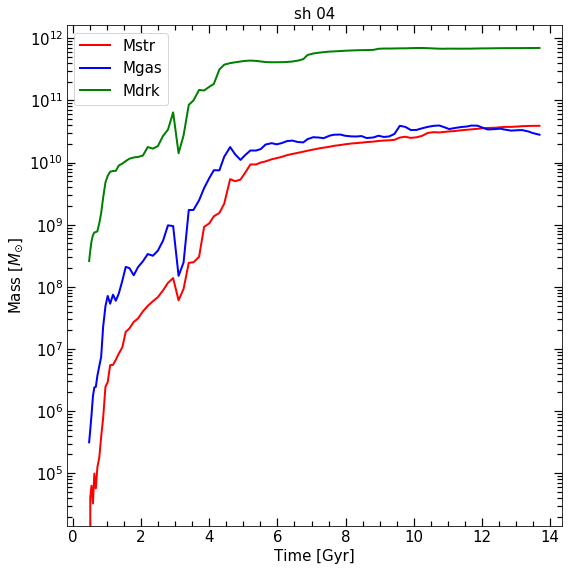

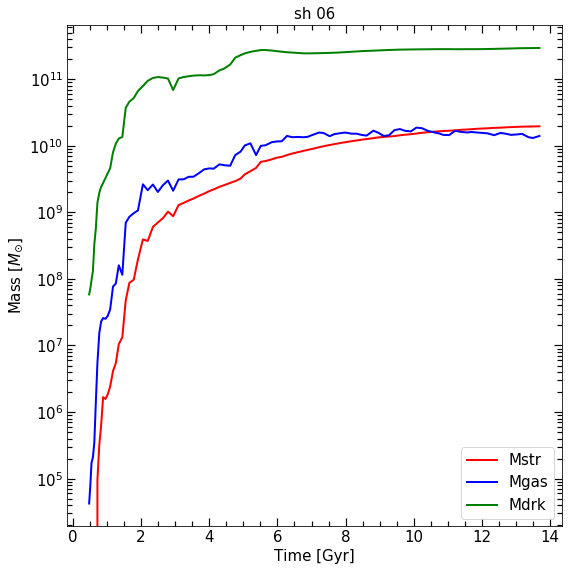

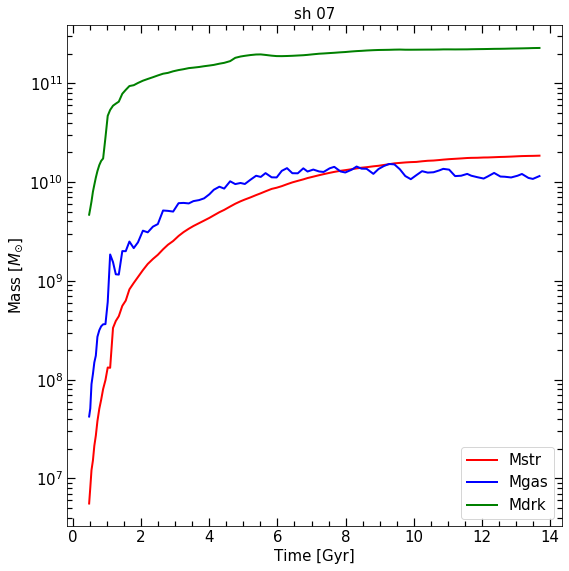

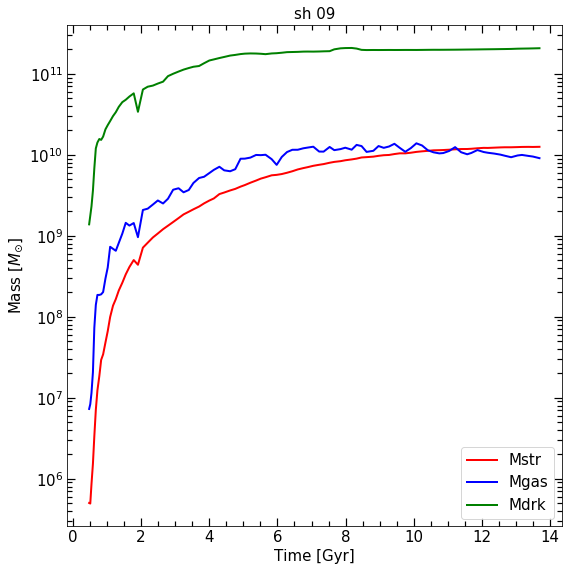

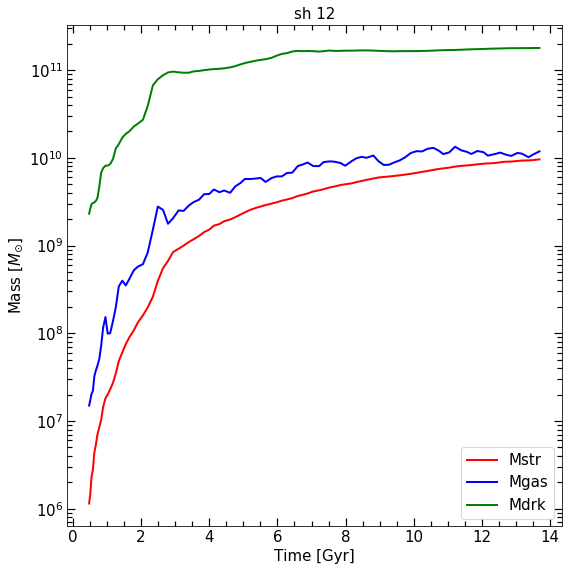

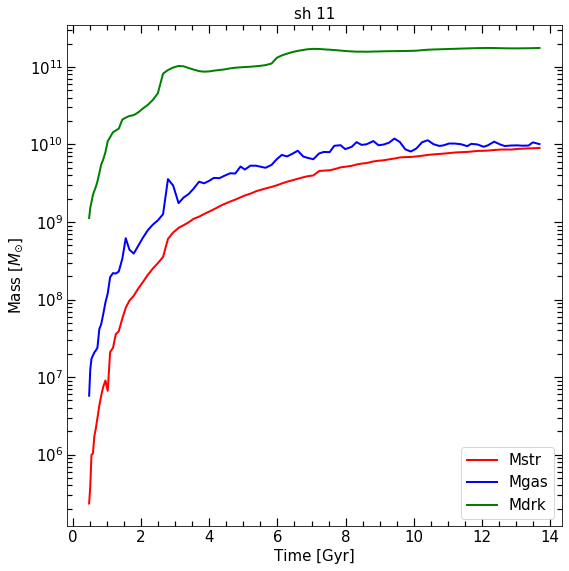

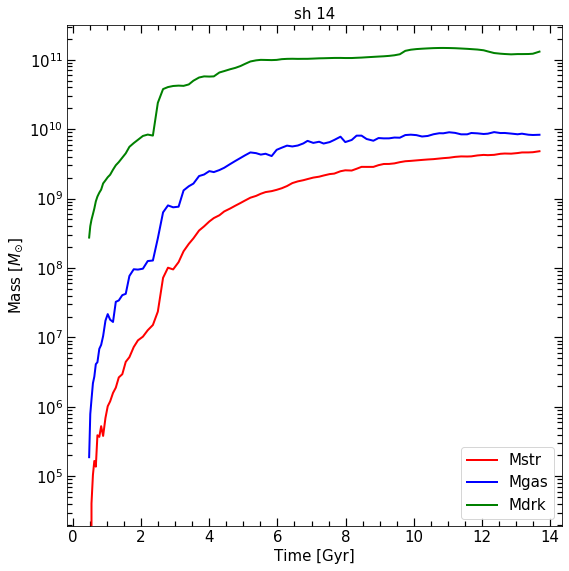

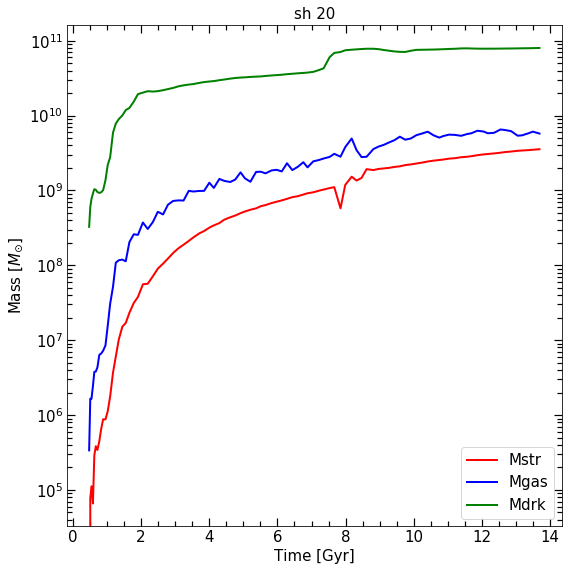

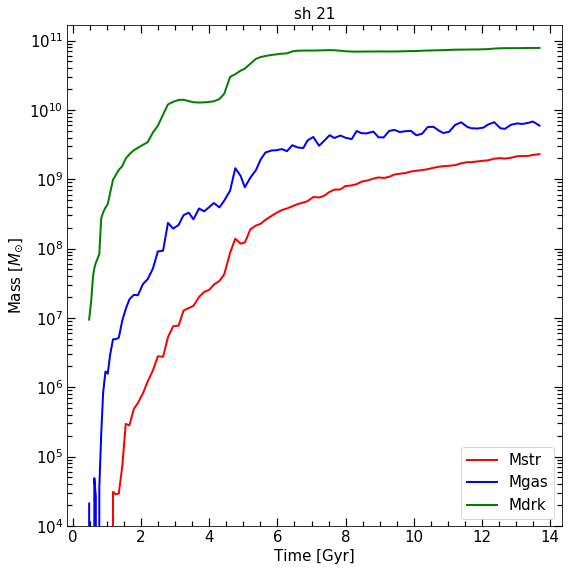

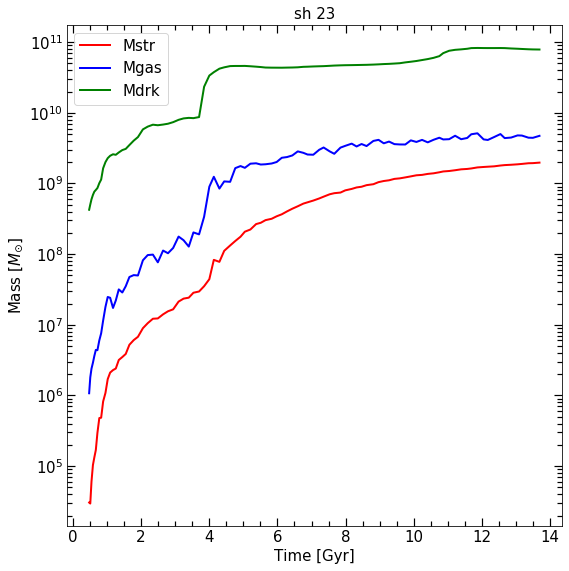

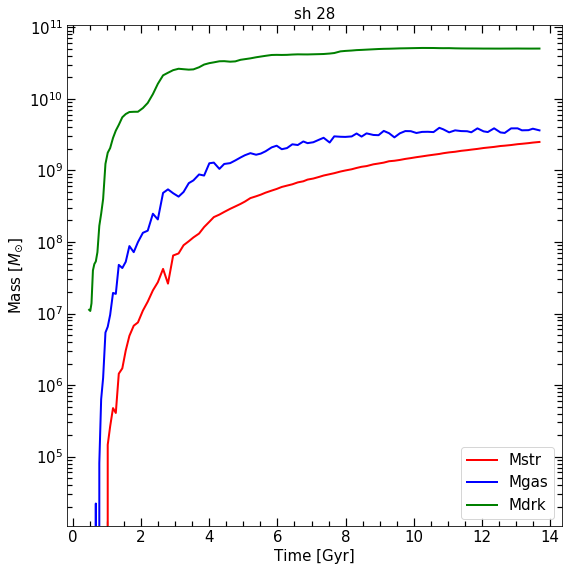

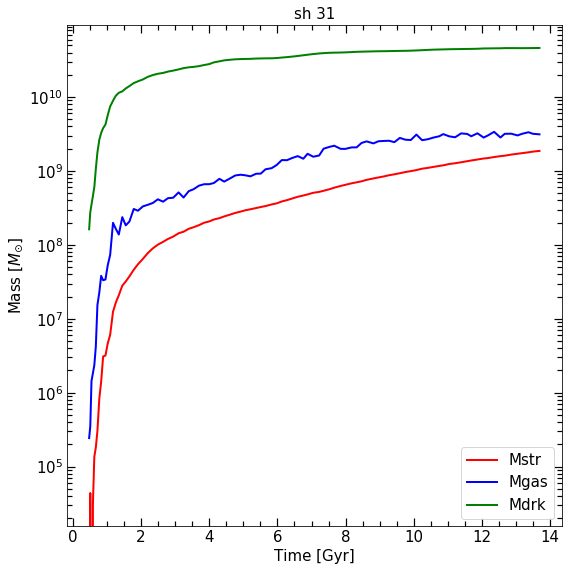

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

for i in range(14):
    
    Id = ''
    for aux in list(str('%d'%ID[i]))[-2:]:
        Id += aux
        
    data = np.loadtxt('../_data/masses/mass_time_sh'+Id+'.dat')
    
    time = data[:,0]
    mstr = data[:,1]
    mgas = data[:,2]
    mdrk = data[:,3]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    fig.subplots_adjust(bottom=0.10, left =0.12, right = 0.98,top=0.97)

    ax.plot(time,mstr,'r-',lw=2,label='Mstr')
    ax.plot(time,mgas,'b-',lw=2,label='Mgas')
    ax.plot(time,mdrk,'g-',lw=2,label='Mdrk')
    ax.minorticks_on()
    ax.tick_params( labelsize=15)
    ax.set_yscale('log')
    ax.tick_params('both', length=5, width=1.2,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=8, width=1.2,which='major', direction='in', right=True,top=True)
    ax.set_xlabel('Time [Gyr]',fontsize=15)
    ax.set_ylabel('Mass [$M_{\odot}$]',fontsize=15)
    ax.set_title('sh '+Id, fontsize=15)
    ax.legend(fontsize=15,fancybox=True)

    plt.show()
    
    fig.savefig('../_imagenes/masses/mass_sh'+Id+'.png',dpi=100, xxbox_inches='tight')    

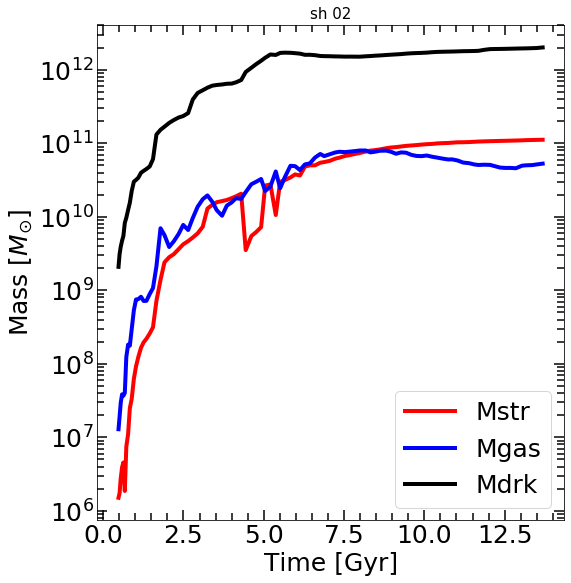

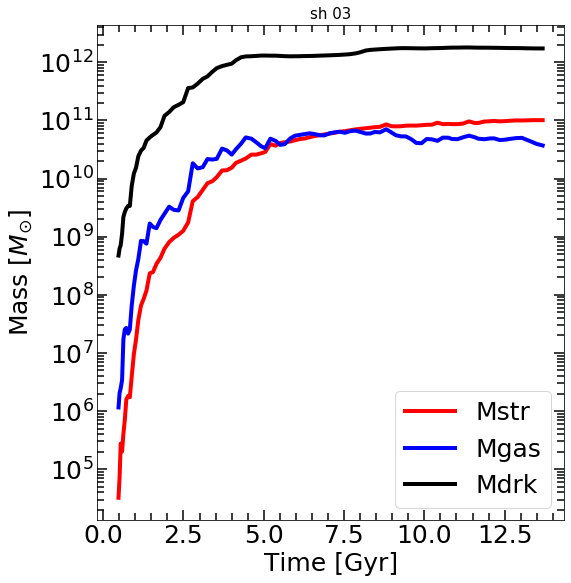

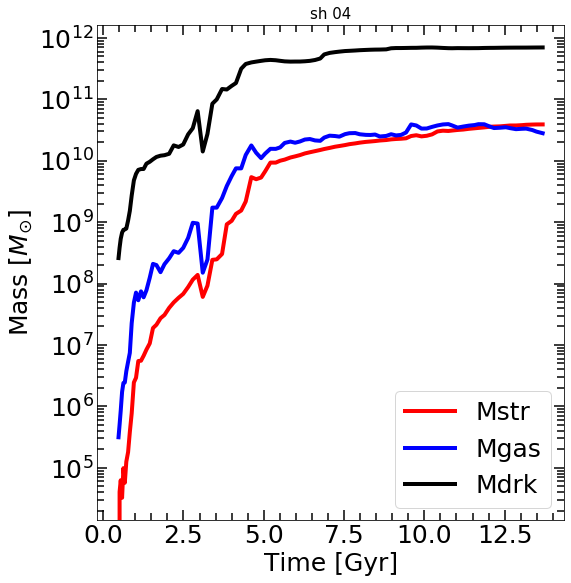

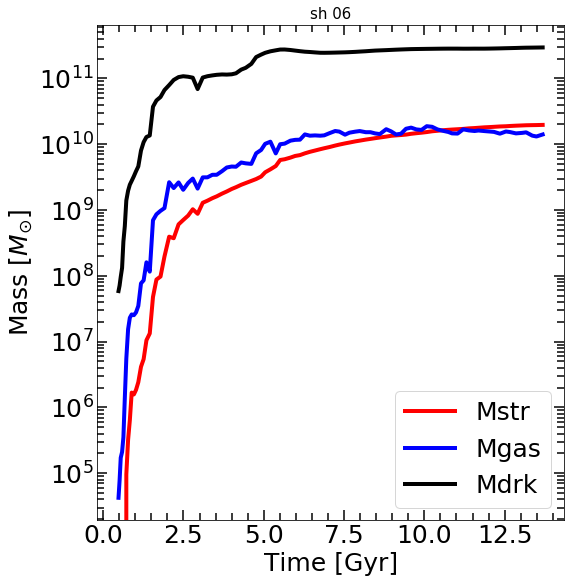

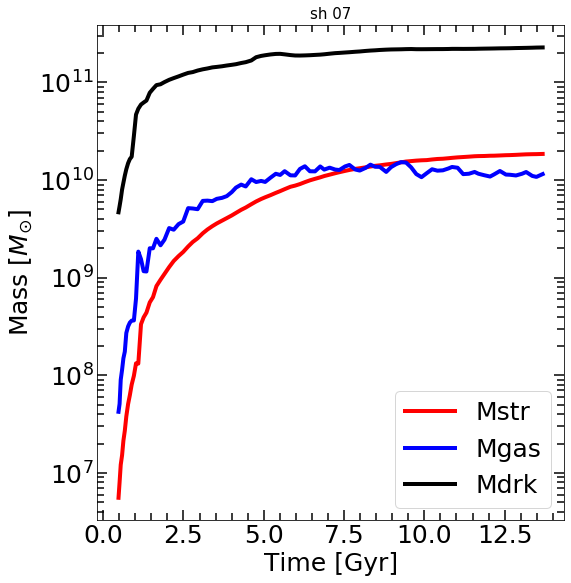

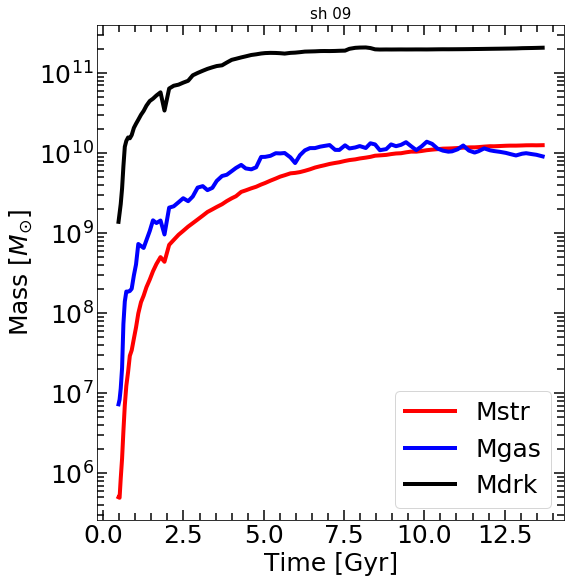

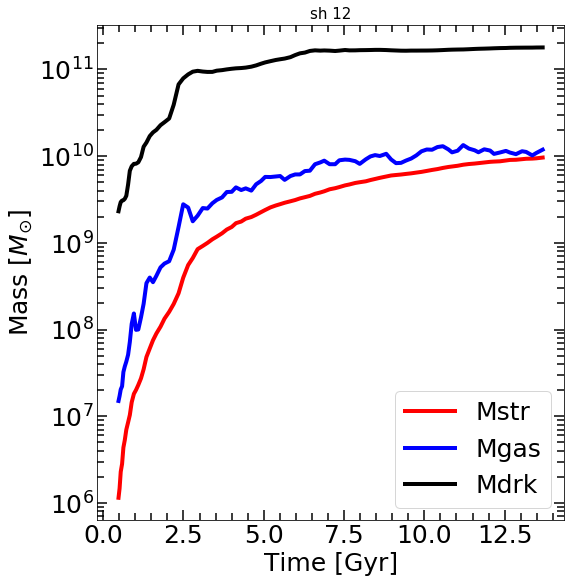

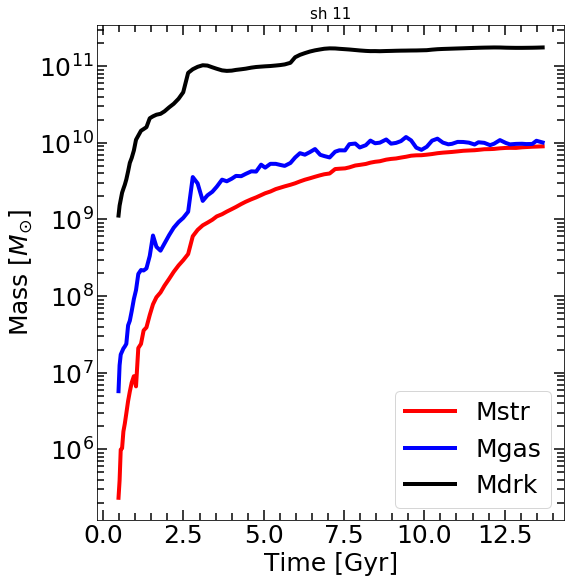

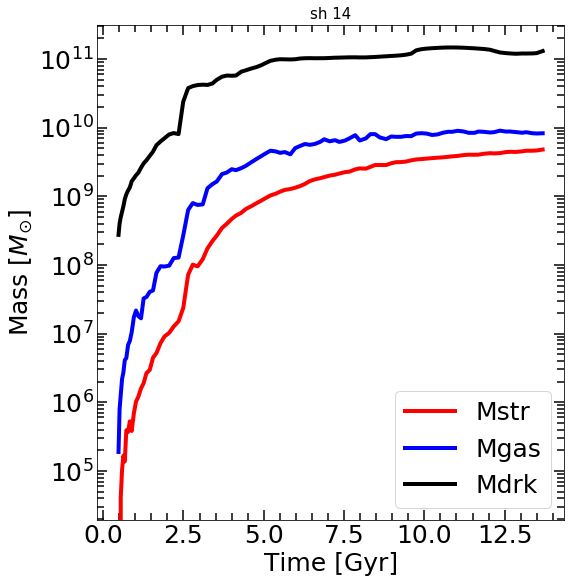

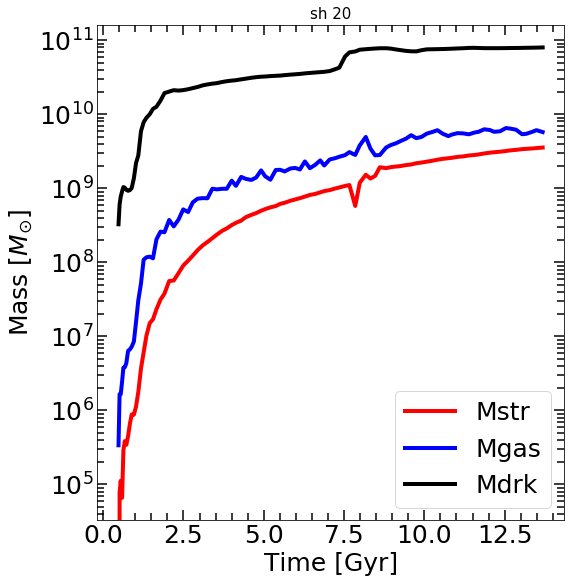

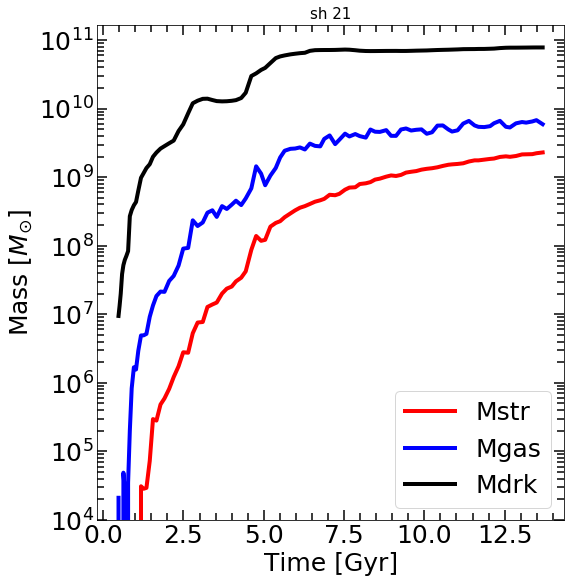

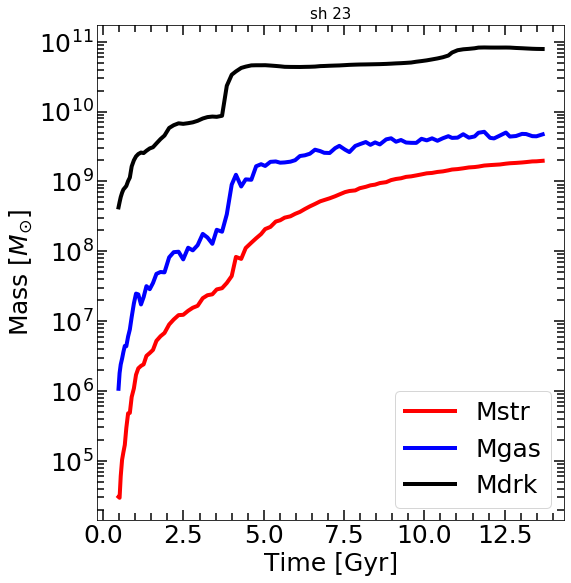

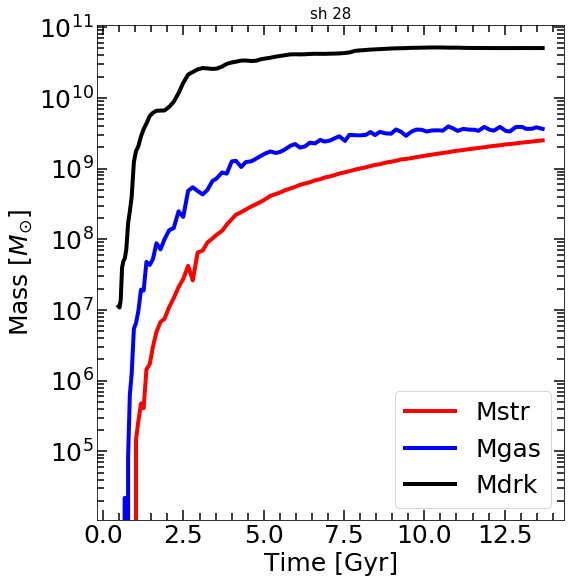

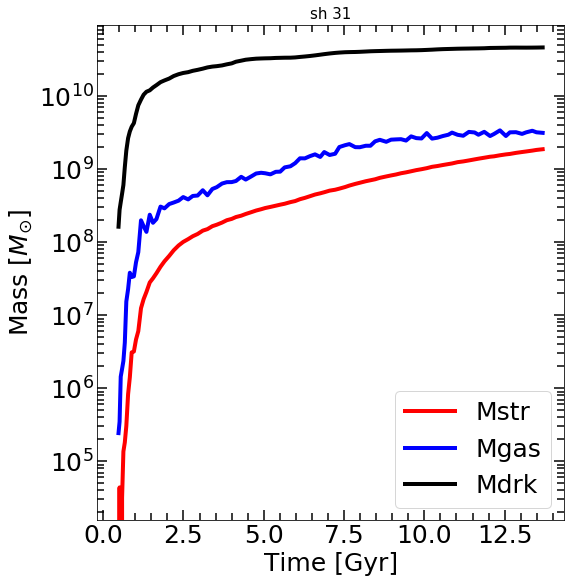

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ID = np.loadtxt('../_data/my_halos.dat')[:,0]

for i in range(14):
    
    Id = ''
    for aux in list(str('%d'%ID[i]))[-2:]:
        Id += aux
        
    data = np.loadtxt('../_data/masses/mass_time_sh'+Id+'.dat')
    
    time = data[:,0]
    mstr = data[:,1]
    mgas = data[:,2]
    mdrk = data[:,3]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
    fig.subplots_adjust(bottom=0.10, left =0.17, right = 0.98,top=0.96)

    ax.plot(time,mstr,'r-',lw=4,label='Mstr')
    ax.plot(time,mgas,'b-',lw=4,label='Mgas')
    ax.plot(time,mdrk,'k-',lw=4,label='Mdrk')
    ax.minorticks_on()
    ax.tick_params(labelsize=25)
    ax.set_yscale('log')
    ax.tick_params('both', length=7, width=1.5,which='minor', direction='in', right=True,top=True)
    ax.tick_params('both', length=10, width=1.5,which='major', direction='in', right=True,top=True)
    ax.set_xlabel('Time [Gyr]',fontsize=25)
    ax.set_ylabel('Mass [$M_{\odot}$]',fontsize=25)
    ax.set_title('sh '+Id, fontsize=15)
    ax.legend(fontsize=25,fancybox=True)

    plt.show()
    
    fig.savefig('../_imagenes/masses/mass2_sh'+Id+'.png',dpi=100, xxbox_inches='tight')    